In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [43]:
# dataset 만들기

In [44]:
def make_linear(w = 0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b 
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(9,5))
    plt.plot(x, y, color='r', label=f'y = {w}*x +{b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

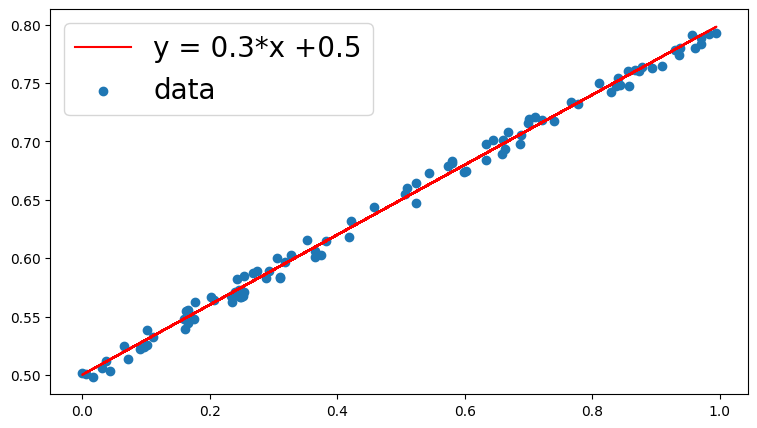

w: 0.3, b: 0.5


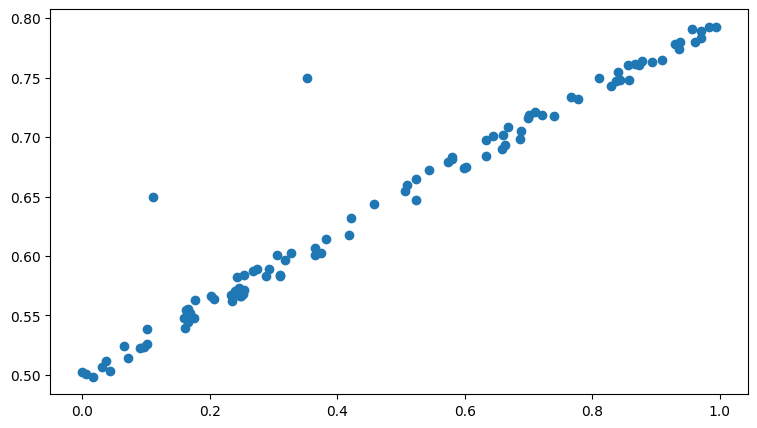

In [45]:
x, y = make_linear(w = 0.3, b=0.5, size=100, noise=0.01)
# 임의로 2개의 outlier를 추가 

y[5] = 0.75
y[10] = 0.65

plt.figure(figsize=(9,5))
plt.scatter(x,y)
plt.show()

In [46]:
# 초기값(Initiality)과 y_hat(예측, prediction) 함수 정의 

In [47]:
w = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

y_hat = w * x + b

In [48]:
# 오차(Error) 정의 : loss furnction은 예측값인 y_hat과 y의 차이의 제곱으로 정의한다.

In [49]:
error = (y_hat - y) ** 2

In [50]:
# 학습률(Learning Rate)

Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

In [51]:
### Gradient Descent 구현 (단항식)

In [52]:
num_epoch = 1000               # 최대 반복 횟수

learning_rate = 0.5            # 학습율(learning rate)

In [53]:
errors = []

w = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f} error = {3:.5f}".format(epoch, w, b, error))
    

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.20892 error = 1.47517
 5 w = 0.37785 error = 0.00119
10 w = 0.36486 error = 0.00087
15 w = 0.35283 error = 0.00072
20 w = 0.34281 error = 0.00061
25 w = 0.33449 error = 0.00054
------------------------------------------------------------
29 w = 0.3, b = 0.5 error = 0.00050


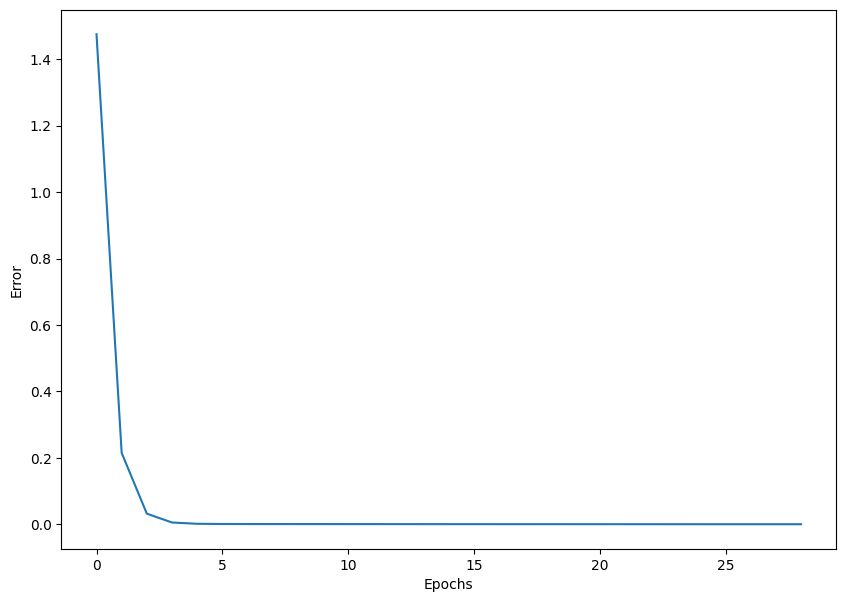

In [54]:
# 학습 진행(epoch)에 따른 오차를 시각화

plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [55]:
### 다항식 구현 (w = 3)

In [56]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

b = np.random.uniform(-1, 1)

In [57]:
y = 0.2 * x1 + 0.5 * x2 + 0.3 * x3 + b  

In [61]:
def plot_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(x1, y)
    plt.scatter(x1,y_hat)
    plt.show()

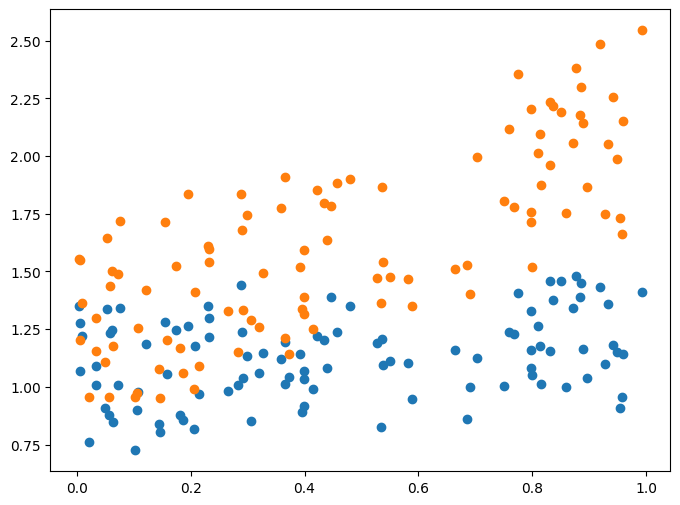

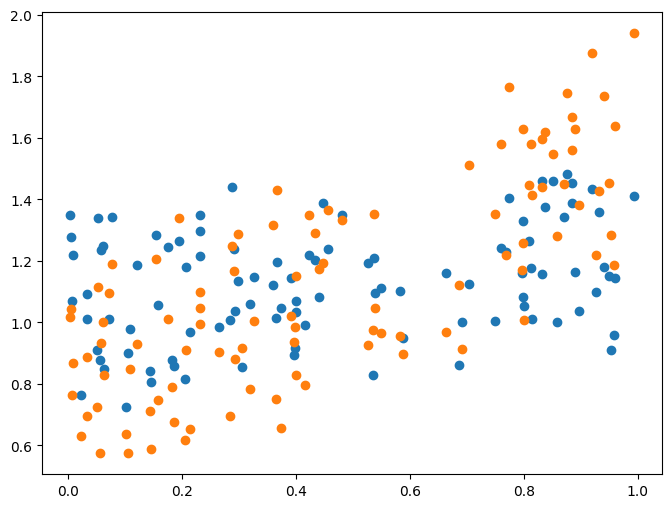

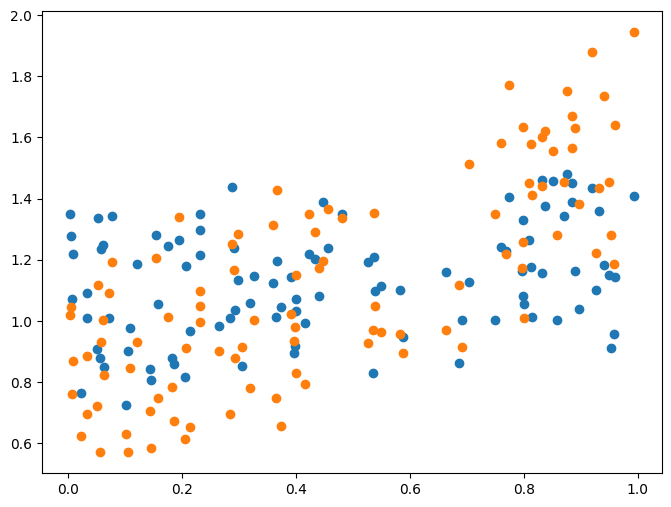

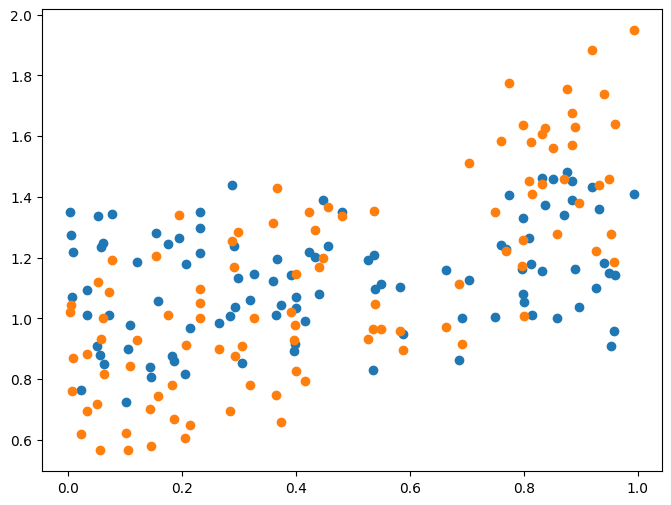

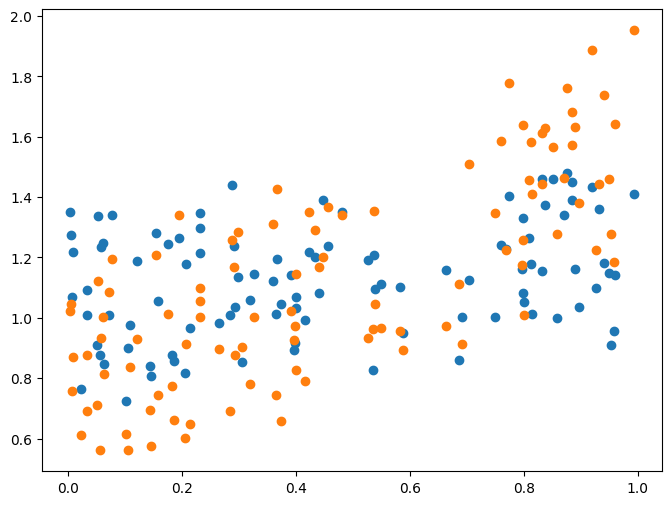

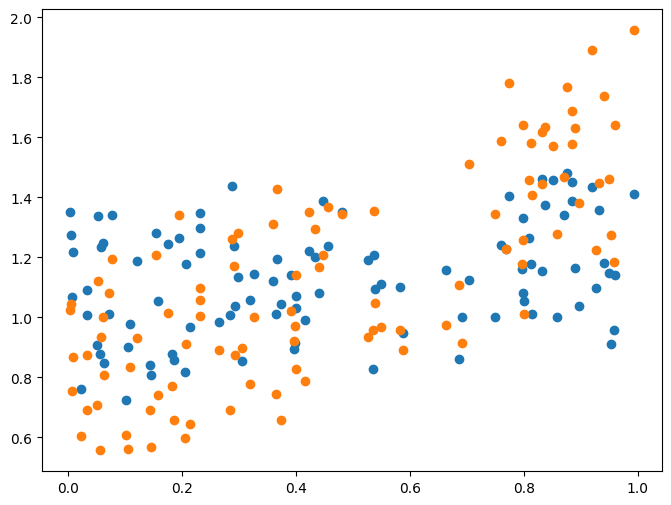

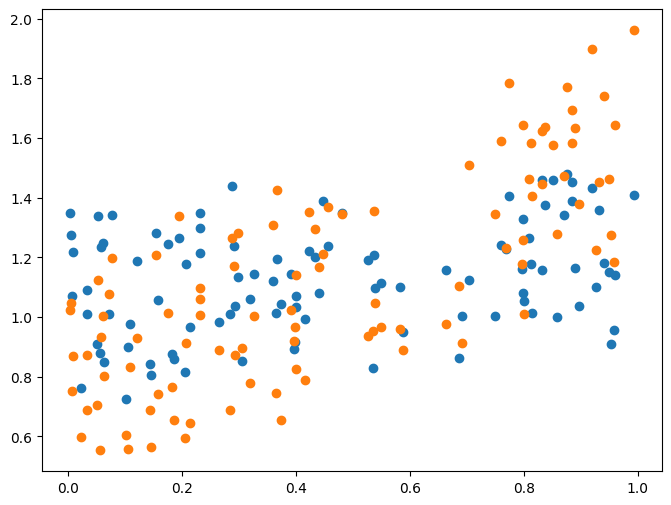

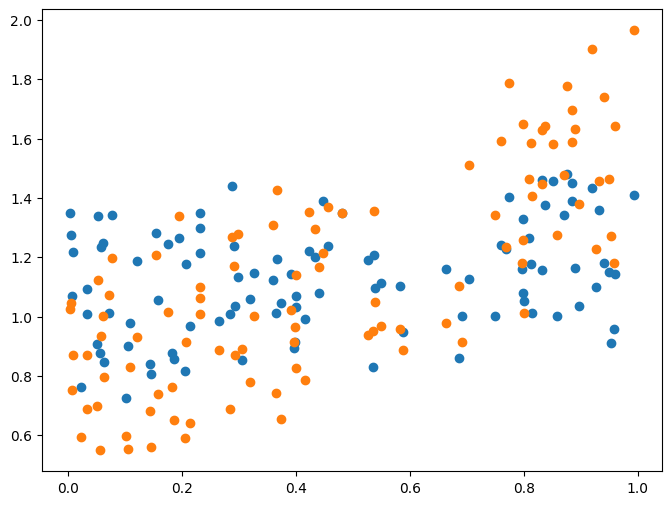

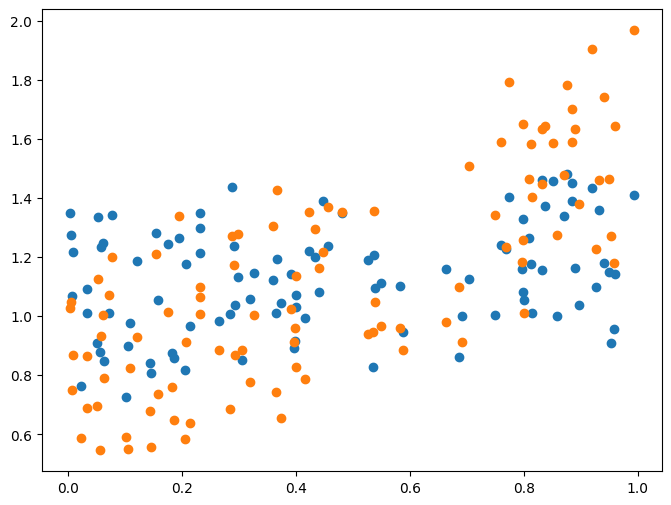

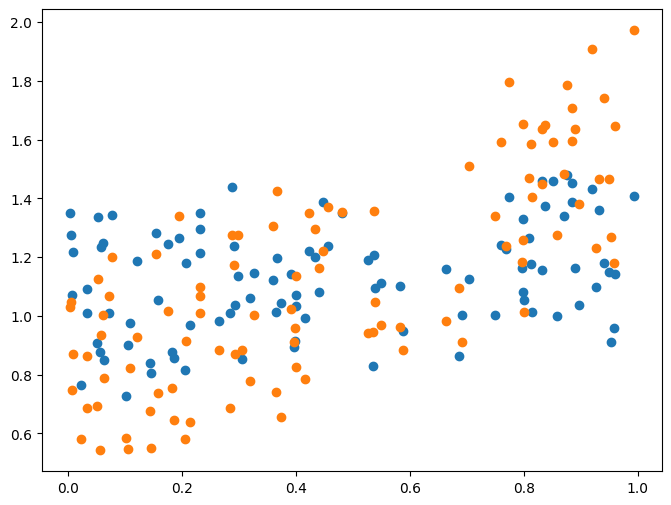

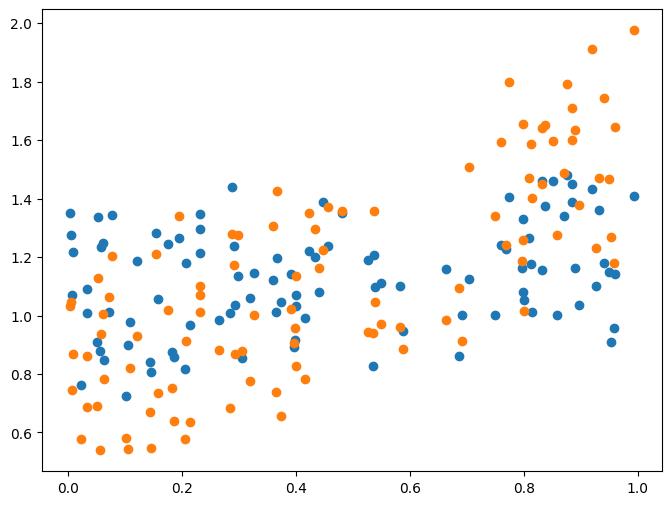

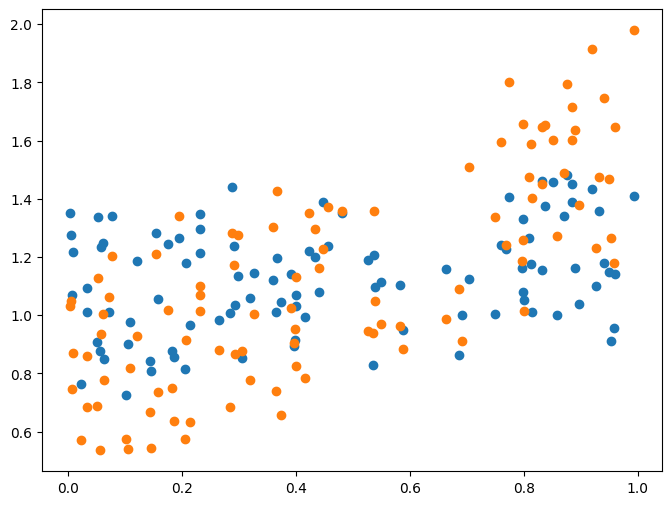

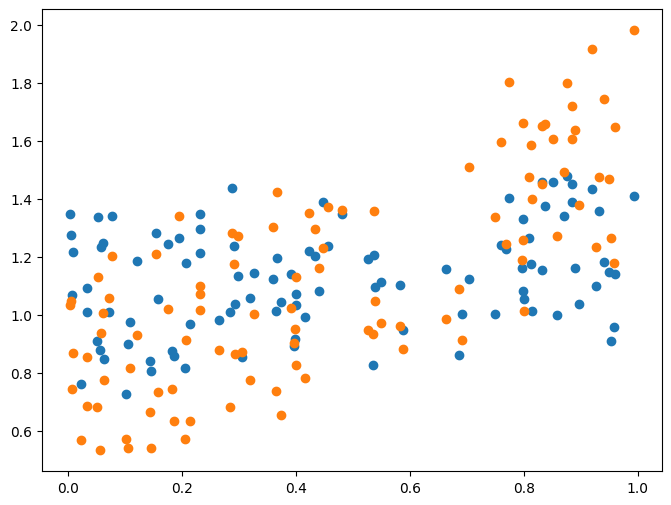

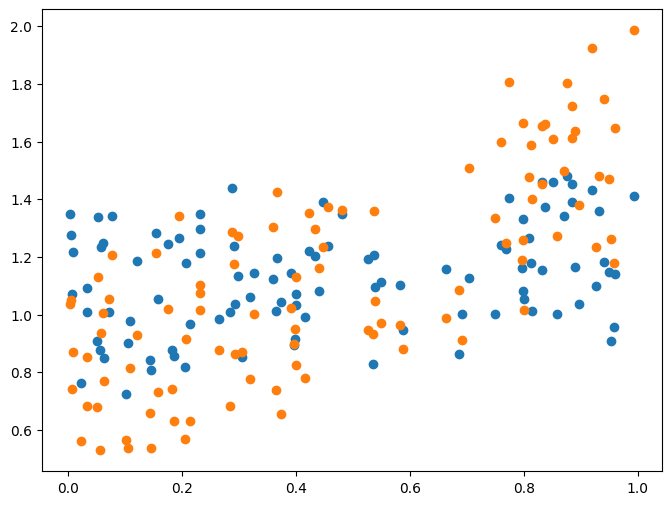

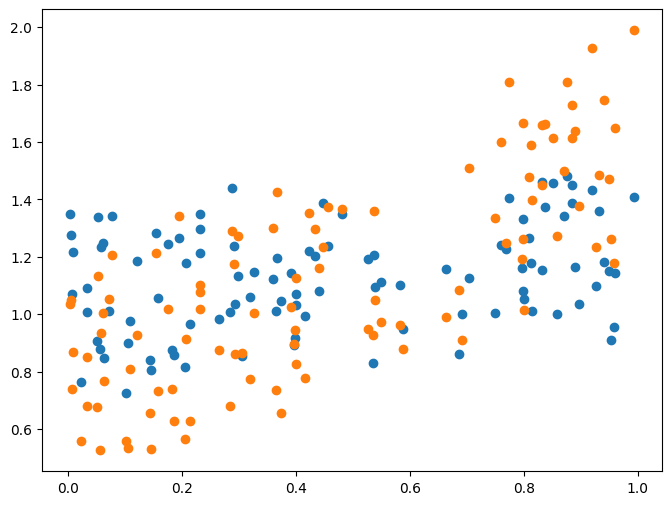

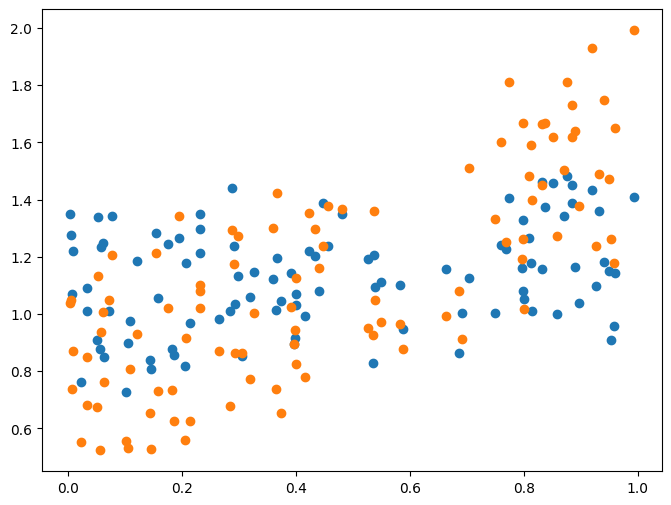

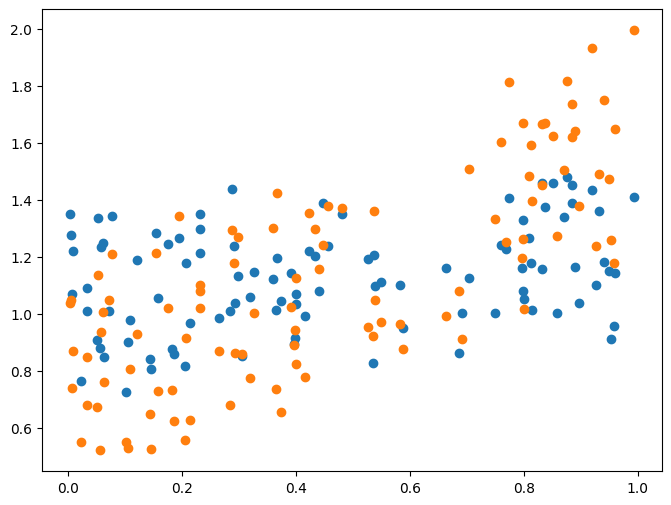

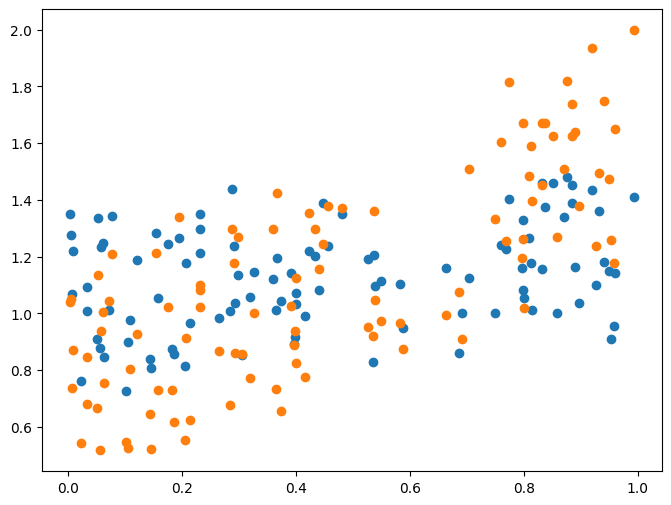

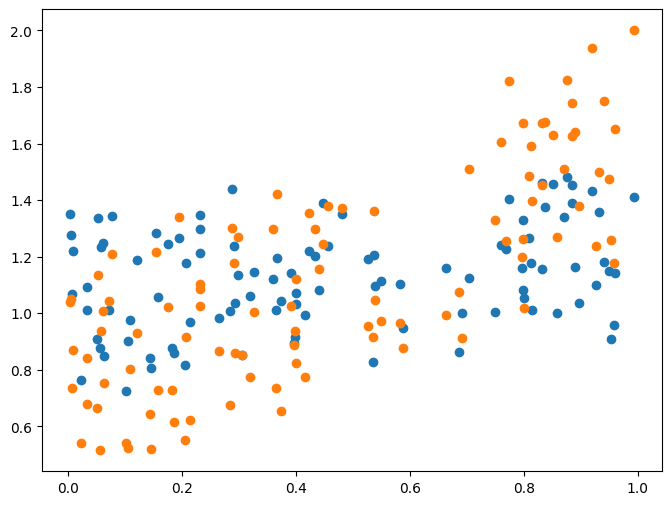

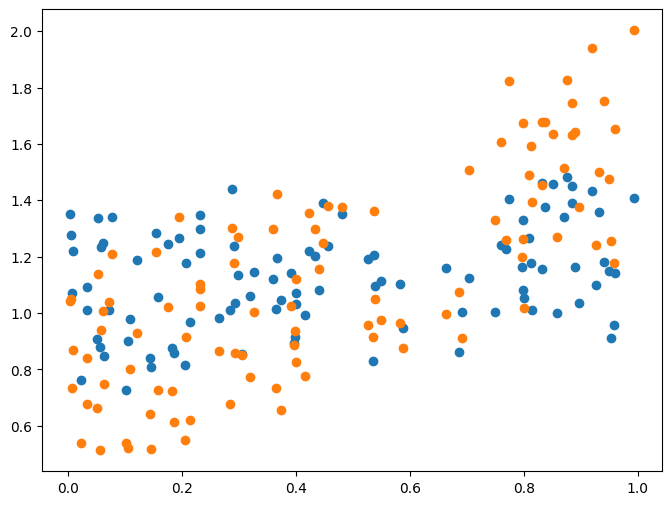

In [62]:
w1 = np.random.uniform(-1,1)
w2 = np.random.uniform(-1,1)
w3 = np.random.uniform(-1,1)

b = np.random.uniform(-1,1)

learning_rate = 0.7

for epoch in range(200):
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = np.abs(y_hat - y).mean()
    if error < 0.001:
        break

    # Gradient Descent 
    w1_grd = learning_rate * ((y_hat - y)*X).mean()
    w2_grd = learning_rate * ((y_hat - y)*X).mean()
    w3_grd = learning_rate * ((y_hat - y)*X).mean()

    b_grb = learning_rate * (y_hat - y).mean()

    # W, b 값 갱신
    w1 = w1 - w1_grd
    w2 = w2 - w2_grd
    w3 = w3 - w3_grd
    
    b = b - b_grb

    if epoch % 10 == 0:
        y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
        plot_prediction(y_hat , y)